<a href="https://colab.research.google.com/github/mujtaba86/final-ml/blob/main/LAB_9_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 9 Feature Selection

# Dr Mohamed Ihmeida

# 23rd July 2025


In [ ]:
# Before you start this lab, make sure you have uploaded the three csv files to your notebook.
# The csv files (datasets) are in the lab folder.



1.   What is Feature Selection?
2.   Why we need Feature Selection?




In [ ]:
# Add your answer here or create new text cell for that



3.  What are the benefits of Feature Selection?
4.  What are the methods of Feature Selection?



In [ ]:
# Add your answer ere

5. What are the common method of feature selection?

In [ ]:
# Add your answer here


In [ ]:
## The implementation without Feature Selection

In [ ]:
## ## The implementation with Feature Selection

6. Comapre the F1 score for KNN and Decision Tree with and without feature selection.

7. Can you draw `bar-chat` for each F1 score?

8. Try to change k_best_count and observe F1-Score

9. Consider the number of features with F1-Score. Draw the realtionship between k_best_count and F1-Score.

In [ ]:
## Add your answer here

In [ ]:
## ## The implementation without Feature Selection with NSL-KDD dataset

In [ ]:
## ## ## The implementation with Feature Selection with NSL-KDD dataset

10. Comapre the F1 score for KNN and Decision Tree with and without feature selection.

11. Can you draw `bar-chat` for each F1 score?

12. Try to change k_best_count and observe F1-Score

13. Consider the number of features with F1-Score. Draw the realtionship between k_best_count and F1-Score.

In [ ]:
# Add your answer here


14. if you could compute the time between the approaches

*   List item
*   List item

with and without feature selection. This will very good!

15. Draw the bar-chart for both approaches times.

In [ ]:
#  Add your answer here

16. Can you summarise the benefits and challenges for feature selection from your experience? (just couple of sentences from your own words)

In [ ]:
# Add your answer here

=== First few rows of the dataset ===
   network_packet_size protocol_type  login_attempts  session_duration  \
0                  599           TCP               4        492.983263   
1                  472           TCP               3       1557.996461   
2                  629           TCP               3         75.044262   
3                  804           UDP               4        601.248835   
4                  453           TCP               5        532.540888   

  encryption_used  ip_reputation_score  failed_logins browser_type  \
0             DES             0.606818              1         Edge   
1             DES             0.301569              0      Firefox   
2             DES             0.739164              2       Chrome   
3             DES             0.123267              0      Unknown   
4             AES             0.054874              1      Firefox   

   unusual_time_access  attack_detected  
0                    0                1  
1           

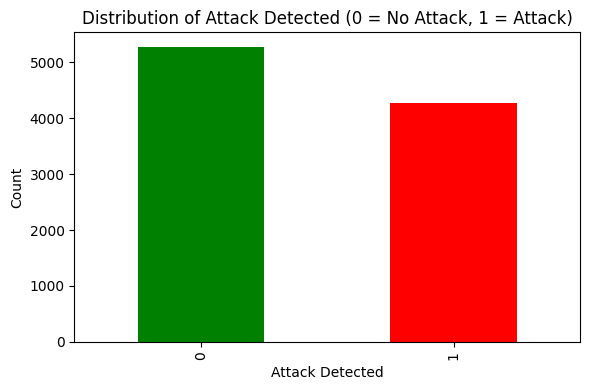

Selected the top 1 features: ['session_duration']

--- Training K-Nearest Neighbors (KNN) ---

F1 Score (KNN): 0.4312

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.56      0.60      0.58      1582
           1       0.45      0.41      0.43      1280

    accuracy                           0.52      2862
   macro avg       0.51      0.51      0.51      2862
weighted avg       0.51      0.52      0.51      2862



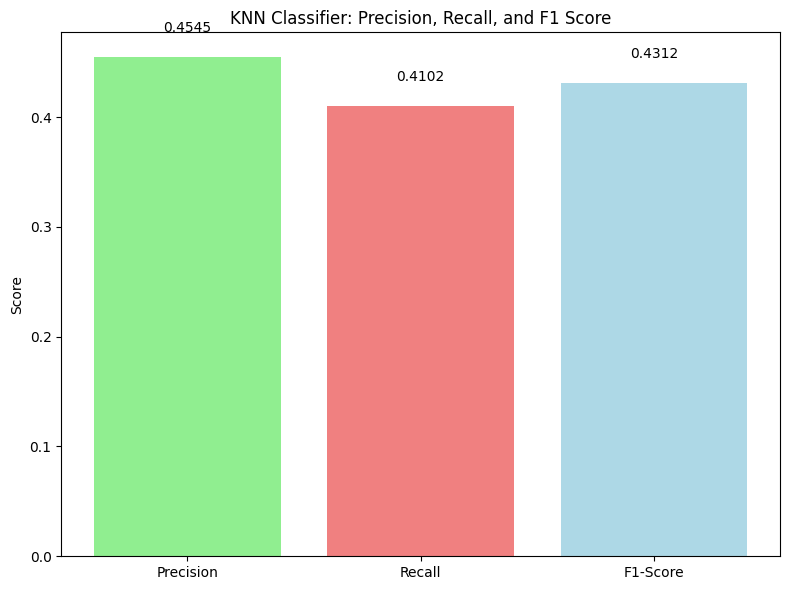

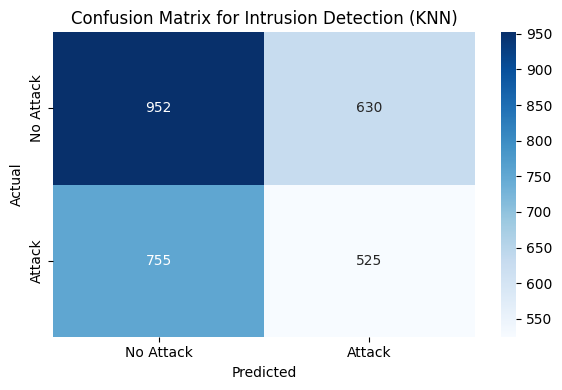

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

# Load the dataset from the uploaded file
df = pd.read_csv('int.csv')

# 1. Data Description
# Drop the session_id as it is an identifier and not a predictive feature
df = df.drop('session_id', axis=1)

# Display the first few rows of the dataset
print("=== First few rows of the dataset ===")
print(df.head())

# Check data structure, missing values, and types
print("\n=== Dataset Structure ===")
df.info()

# Get summary statistics for numerical columns
print("\n=== Summary Statistics ===")
print(df.describe())

# Inspect the distribution of categorical columns (e.g., 'attack_detected')
print("\n=== Value counts for categorical columns ===")
print(df['attack_detected'].value_counts())

# Visualize the distribution of the target variable 'attack_detected'
plt.figure(figsize=(6, 4))
df['attack_detected'].value_counts().plot(kind='bar', color=["green", "red"])
plt.title("Distribution of Attack Detected (0 = No Attack, 1 = Attack)")
plt.xlabel("Attack Detected")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2. Preprocess the Data
# One-hot encode categorical features. This converts categories into a numerical format.
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)

# Separate features (X) from the target variable (y)
X = df_encoded.drop('attack_detected', axis=1)
y = df_encoded['attack_detected']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Apply Feature Selection (SelectKBest with chi2)
k_best_count = 1 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k_best_count)

# Fit the selector to the training data and transform it
X_train_kbest = selector.fit_transform(X_train, y_train)

# Transform the test data using the same fitted selector
X_test_kbest = selector.transform(X_test)

# Get the names of the selected features for reference
selected_features_mask = selector.get_support()
selected_features_names = X_train.columns[selected_features_mask]
print(f"Selected the top {k_best_count} features: {list(selected_features_names)}\n")

# 4. Scale Selected Features for KNN
# KNN is sensitive to the scale of data, so we scale the selected features.
scaler = StandardScaler()
X_train_kbest_scaled = scaler.fit_transform(X_train_kbest)
X_test_kbest_scaled = scaler.transform(X_test_kbest)

# 5. Train and Evaluate K-Nearest Neighbors (KNN)
print("--- Training K-Nearest Neighbors (KNN) ---")
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the scaled training data
knn.fit(X_train_kbest_scaled, y_train)

# Make predictions on the scaled test data
y_pred_knn = knn.predict(X_test_kbest_scaled)

# Calculate the F1 score, Precision, and Recall
f1_knn = f1_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn, output_dict=True)

precision_knn = report['1']['precision']  # Precision for Attack (1)
recall_knn = report['1']['recall']      # Recall for Attack (1)

# Print the F1 score and the classification report
print(f"\nF1 Score (KNN): {f1_knn:.4f}")
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# 6. Bar Chart to visualize Precision, Recall, and F1-Score
metrics = [precision_knn, recall_knn, f1_knn]
metrics_labels = ['Precision', 'Recall', 'F1-Score']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics_labels, metrics, color=['lightgreen', 'lightcoral', 'lightblue'])

# Add the values on top of the bars
for i, value in enumerate(metrics):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center', va='bottom', color='black')

# Add titles and labels
plt.title('KNN Classifier: Precision, Recall, and F1 Score')
plt.ylabel('Score')
plt.tight_layout()

# Show the plot
plt.show()

# 7. Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attack", "Attack"], yticklabels=["No Attack", "Attack"])
plt.title("Confusion Matrix for Intrusion Detection (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



--- Training Decision Tree on Selected Features ---

F1 Score (Decision Tree): 0.4527

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.55      0.54      0.55      1582
           1       0.45      0.46      0.45      1280

    accuracy                           0.50      2862
   macro avg       0.50      0.50      0.50      2862
weighted avg       0.51      0.50      0.51      2862



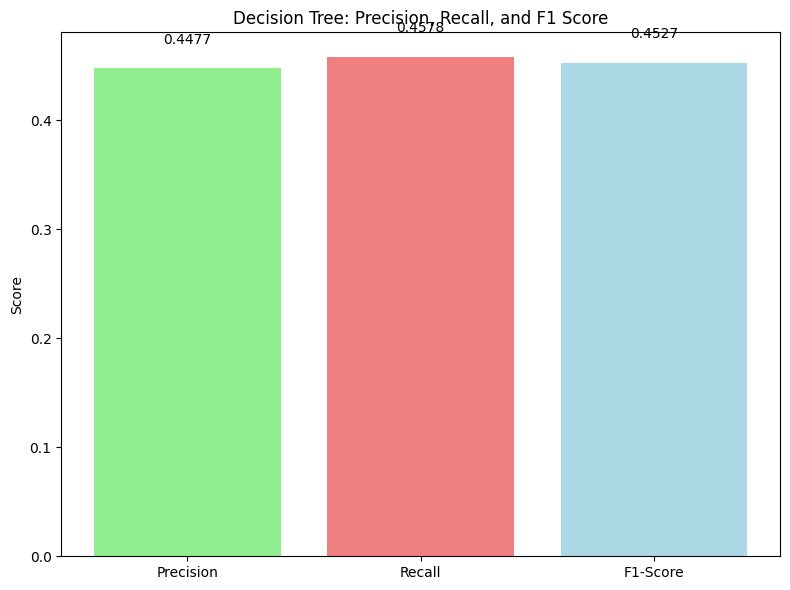

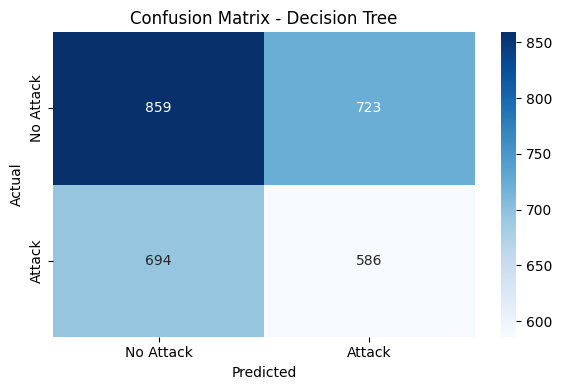

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# 1. Train and Evaluate Decision Tree on Selected Features
print("\n--- Training Decision Tree on Selected Features ---")

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model on the selected (but unscaled) training data
dt.fit(X_train_kbest, y_train)

# Make predictions on the selected test data
y_pred_dt = dt.predict(X_test_kbest)

# Calculate the F1 score
f1_dt = f1_score(y_test, y_pred_dt)

# Generate a classification report
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# Extract precision and recall for class 1 (attack detected)
precision_dt = report_dt['1']['precision']
recall_dt = report_dt['1']['recall']

# Print metrics
print(f"\nF1 Score (Decision Tree): {f1_dt:.4f}")
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# 2. Bar Chart for Decision Tree Metrics
metrics_dt = [precision_dt, recall_dt, f1_dt]
labels_dt = ['Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(8, 6))
plt.bar(labels_dt, metrics_dt, color=['lightgreen', 'lightcoral', 'lightblue'])

# Add values on top of the bars
for i, value in enumerate(metrics_dt):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center', va='bottom')

plt.title('Decision Tree: Precision, Recall, and F1 Score')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# 3. Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Attack", "Attack"],
            yticklabels=["No Attack", "Attack"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



F1 Score (Logistic Regression): 0.0733

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.98      0.71      1582
           1       0.59      0.04      0.07      1280

    accuracy                           0.56      2862
   macro avg       0.57      0.51      0.39      2862
weighted avg       0.57      0.56      0.43      2862



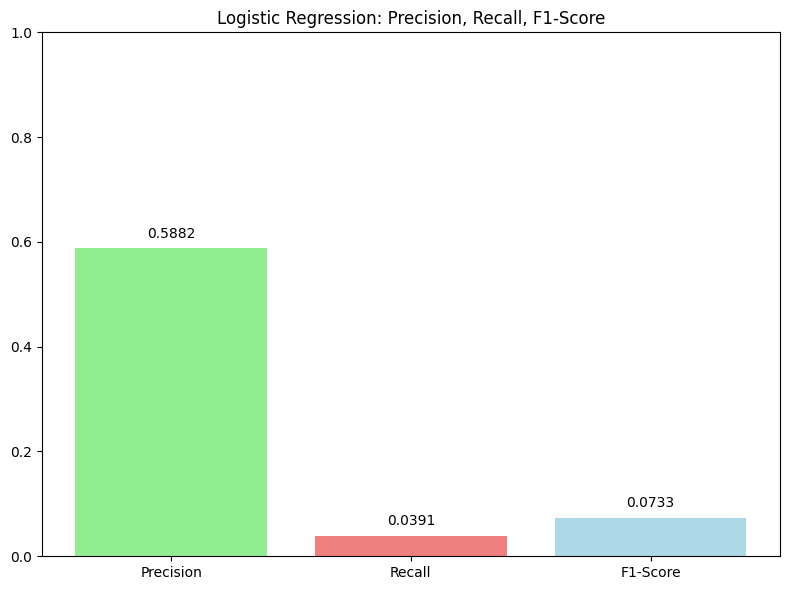

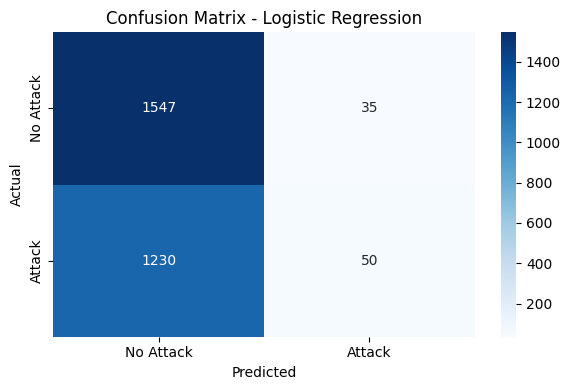

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score,
    classification_report,
    confusion_matrix,
)

# 1. Load the dataset
df = pd.read_csv('int.csv')

# 2. Drop non-predictive identifier
df = df.drop('session_id', axis=1)

# 3. One-hot encode categorical features
df_encoded = pd.get_dummies(
    df,
    columns=['protocol_type', 'encryption_used', 'browser_type'],
    drop_first=True
)

# 4. Separate features and target
X = df_encoded.drop('attack_detected', axis=1)
y = df_encoded['attack_detected']

# 5. Train/test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
"""
 # 6. Feature selection: SelectKBest with chi²
k_best = 9
selector = SelectKBest(score_func=chi2, k=k_best)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest  = selector.transform(X_test)

# (Optional) print which features were selected
selected_features = X_train.columns[selector.get_support()]
print(f"Selected top {k_best} features: {list(selected_features)}")

# 7. Scale the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_kbest)
X_test_scaled  = scaler.transform(X_test_kbest)
dt.fit(X_train_kbest, y_train)
"""
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_kbest_scaled, y_train)
y_pred_lr = lr.predict(X_test_kbest_scaled)

# 10. Compute metrics and name them for comparison
report_lr    = classification_report(y_test, y_pred_lr, output_dict=True)
precision_lr = report_lr['1']['precision']
recall_lr    = report_lr['1']['recall']
f1_lr        = f1_score(y_test, y_pred_lr)

print(f"\nF1 Score (Logistic Regression): {f1_lr:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# 11. Build lr_metrics for your comparison plots
lr_metrics = [precision_lr, recall_lr, f1_lr]
# (You can still plot them standalone if you like:)
labels = ['Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(8, 6))
plt.bar(labels, lr_metrics, color=['lightgreen','lightcoral','lightblue'])
for i, v in enumerate(lr_metrics):
    plt.text(i, v+0.02, f"{v:.4f}", ha='center')
plt.title('Logistic Regression: Precision, Recall, F1-Score')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

# 12. Confusion Matrix (optional)
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attack','Attack'],
            yticklabels=['No Attack','Attack'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


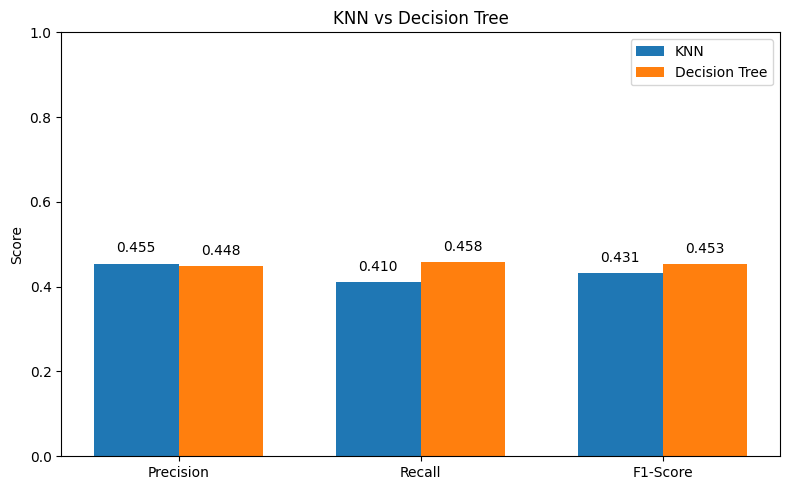

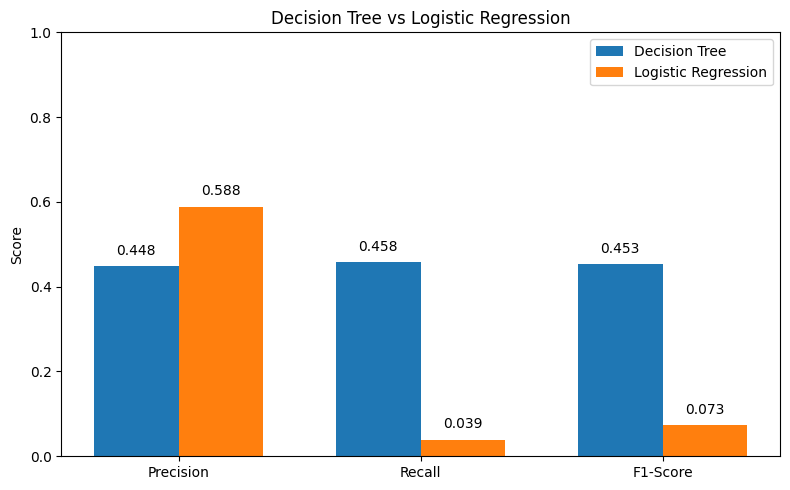

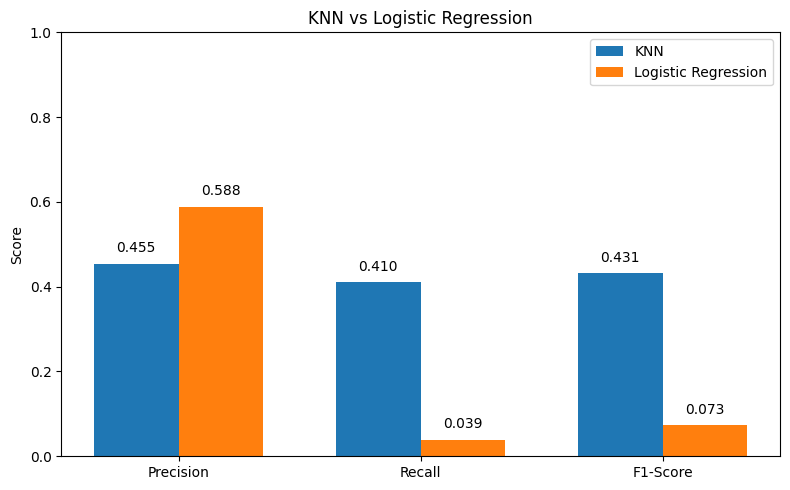

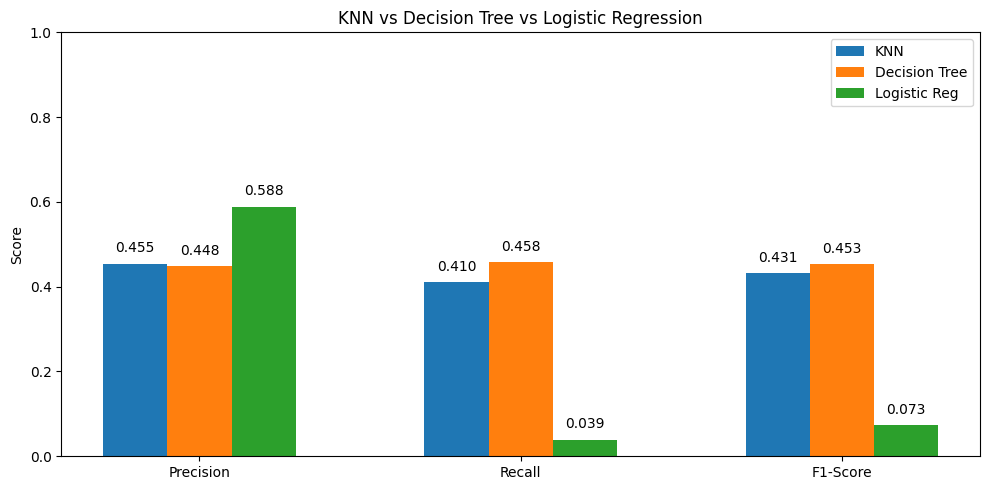

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# --- ASSUMES these variables are already defined: ---
# precision_knn, recall_knn, f1_knn
# precision_dt,  recall_dt,  f1_dt
# precision_lr,  recall_lr,  f1_lr

# Prepare metric lists
knn_metrics = [precision_knn, recall_knn, f1_knn]
dt_metrics  = [precision_dt,  recall_dt,  f1_dt]
lr_metrics  = [precision_lr,  recall_lr,  f1_lr]
labels      = ['Precision', 'Recall', 'F1-Score']
x           = np.arange(len(labels))

def plot_pair(a_metrics, b_metrics, a_label, b_label):
    width = 0.35
    fig, ax = plt.subplots(figsize=(8, 5))
    bars1 = ax.bar(x - width/2, a_metrics, width, label=a_label)
    bars2 = ax.bar(x + width/2, b_metrics, width, label=b_label)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 1)
    ax.set_ylabel('Score')
    ax.set_title(f'{a_label} vs {b_label}')
    ax.legend()
    # Annotate bars
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2,
                height + 0.02,
                f"{height:.3f}",
                ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

# 1. KNN vs Decision Tree
plot_pair(knn_metrics, dt_metrics, 'KNN', 'Decision Tree')

# 2. Decision Tree vs Logistic Regression
plot_pair(dt_metrics, lr_metrics, 'Decision Tree', 'Logistic Regression')

# 3. KNN vs Logistic Regression
plot_pair(knn_metrics, lr_metrics, 'KNN', 'Logistic Regression')


# 4. All three models together
width = 0.2
fig, ax = plt.subplots(figsize=(10, 5))
bars_knn = ax.bar(x - width, knn_metrics, width, label='KNN')
bars_dt  = ax.bar(x,           dt_metrics,  width, label='Decision Tree')
bars_lr  = ax.bar(x + width,  lr_metrics,  width, label='Logistic Reg')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('KNN vs Decision Tree vs Logistic Regression')
ax.legend()

# Annotate all bars
for bar in bars_knn + bars_dt + bars_lr:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            h + 0.02,
            f"{h:.3f}",
            ha='center', va='bottom')

plt.tight_layout()
plt.show()


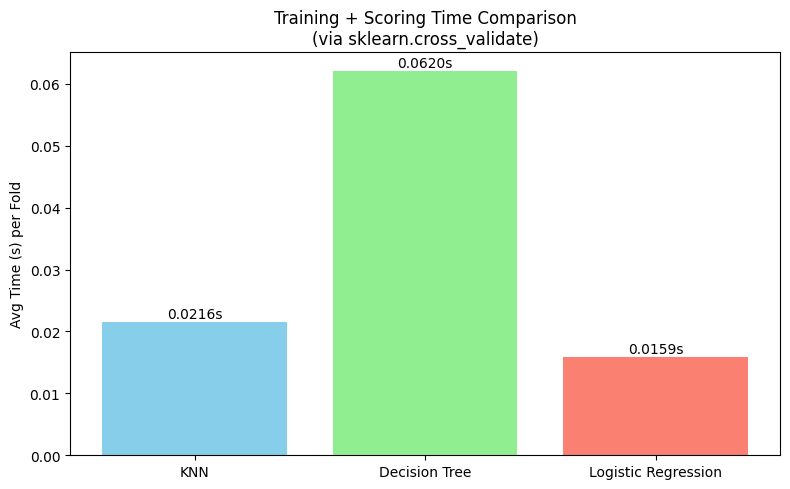

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# 1. Load & preprocess
df = pd.read_csv('int.csv')
df = df.drop('session_id', axis=1)
df = pd.get_dummies(df,
                    columns=['protocol_type', 'encryption_used', 'browser_type'],
                    drop_first=True)

X = df.drop('attack_detected', axis=1)
y = df['attack_detected']

# 2. Define pipelines
pipelines = {
    'KNN': Pipeline([
        ('select', selector),
        ('scale', scaler),
        ('clf',   KNeighborsClassifier(n_neighbors=5))
    ]),
    'Decision Tree': Pipeline([
        ('select', selector),
        ('clf',   DecisionTreeClassifier(random_state=42))
    ]),
    'Logistic Regression': Pipeline([
        ('select', selector),
        ('scale', scaler),
        ('clf',   LogisticRegression(max_iter=1000, random_state=42))
    ]),
}

# 3. Use cross_validate to capture fit + score time
times = {}
for name, pipe in pipelines.items():
    cv_results = cross_validate(
        pipe, X, y,
        cv=5,
        scoring='f1',
        return_train_score=False,
        n_jobs=-1
    )
    # Compute average of fit_time+score_time across folds
    avg_time = cv_results['fit_time'].mean() + cv_results['score_time'].mean()
    times[name] = avg_time

# 4. Plot the comparison
labels = list(times.keys())
durations = [times[n] for n in labels]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, durations, color=['skyblue', 'lightgreen', 'salmon'])
for bar, t in zip(bars, durations):
    plt.text(bar.get_x() + bar.get_width()/2,
             t + max(durations)*0.01,
             f"{t:.4f}s",
             ha='center')

plt.ylabel('Avg Time (s) per Fold')
plt.title('Training + Scoring Time Comparison\n(via sklearn.cross_validate)')
plt.tight_layout()
plt.show()
